In [1]:
import numpy as np
from datascience import *
import matplotlib.pylab as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
birth1 = Table.read_table("baby.csv")
birth1["Birth Weight"] = birth1.apply(lambda x : x*28.3495, "Birth Weight")

In [3]:
birth = birth1.copy()
birth

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
3401.94,284,27,62,100,False
3203.49,282,33,64,135,False
3628.74,279,28,64,115,True
3061.75,282,23,67,125,True
3855.53,286,25,62,93,False
3912.23,244,33,62,178,False
3742.13,245,23,65,140,False
3401.94,289,25,62,125,False
4053.98,299,30,66,136,True
3968.93,351,27,68,120,False


# ¿Cómo estimar el peso de un bebe al nacer?

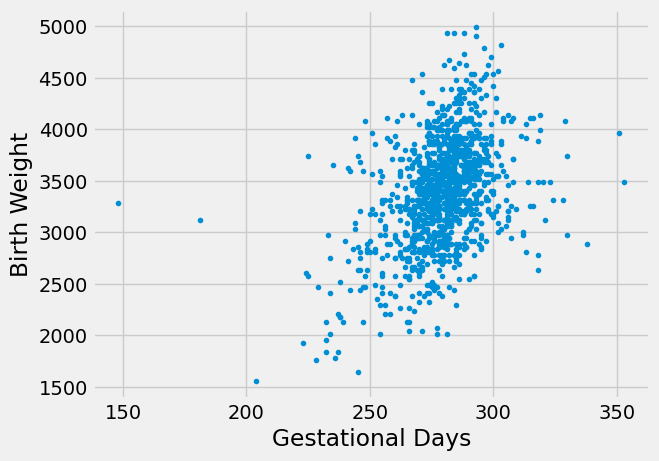

In [5]:
plots.figure()
plots.plot(birth.column(1), birth.column(0), ".")
plots.xlabel("Gestational Days")
plots.ylabel("Birth Weight")
plots.show()

In [6]:
birth["Ratio g/dias"] = birth.column("Birth Weight")/birth.column("Gestational Days")

In [7]:
ratios = birth.select("Birth Weight","Gestational Days","Ratio g/dias")

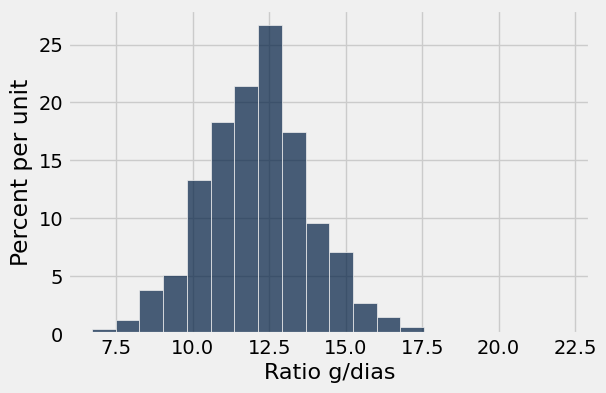

In [8]:
ratios.select("Ratio g/dias").hist(bins=20)


In [9]:
ratios.sort('Ratio g/dias', descending=True).take(0)

Birth Weight,Gestational Days,Ratio g/dias
3288.54,148,22.2199


In [10]:
ratios.sort('Ratio g/dias', descending=True)

Birth Weight,Gestational Days,Ratio g/dias
3288.54,148,22.2199
4932.81,281,17.5545
4932.81,284,17.3691
3118.44,181,17.229
4932.81,288,17.1278
4989.51,293,17.0291
4479.22,267,16.7761
4904.46,293,16.7388
4535.92,271,16.7377
3742.13,225,16.6317


In [11]:
ratios.sort('Ratio g/dias', descending=False)

Birth Weight,Gestational Days,Ratio g/dias
1644.27,245,6.71131
2012.81,281,7.16304
2012.81,277,7.26648
2069.51,277,7.47117
2041.16,271,7.53197
1786.02,236,7.56787
1559.22,204,7.64325
2041.16,266,7.67355
1757.67,228,7.70907
1842.72,237,7.77518


In [12]:
percentile(50, ratios.column(2))

12.164147163120568

El valor de $12.16$ g representa la mediana, lo que significa que la mitad de los datos se encuentran por debajo de este valor y la otra mitad por encima. En otras palabras, el 50% de los bebés pesan menos de $12.16$ g, mientras que el otro 50% pesa más.

# Construir un intervalo de confianza

In [15]:
def one_bootstrap_median():
    resample = ratios.sample()
    return percentile(50, resample.column(2))

In [16]:
num_repetitions = 5000
medians = make_array()
for i in range(0, num_repetitions):
    medians=np.append(medians,one_bootstrap_median())
medians

array([ 12.12043841,  12.19125256,  12.24182955, ...,  12.14978571,
        12.20603472,  12.09314336])

(array([    5.,    11.,    97.,   283.,  1164.,  1922.,  1256.,   179.,
           73.,    10.]),
 array([ 11.93663158,  11.97819664,  12.01976169,  12.06132675,
         12.1028918 ,  12.14445686,  12.18602192,  12.22758697,
         12.26915203,  12.31071709,  12.35228214]),
 <BarContainer object of 10 artists>)

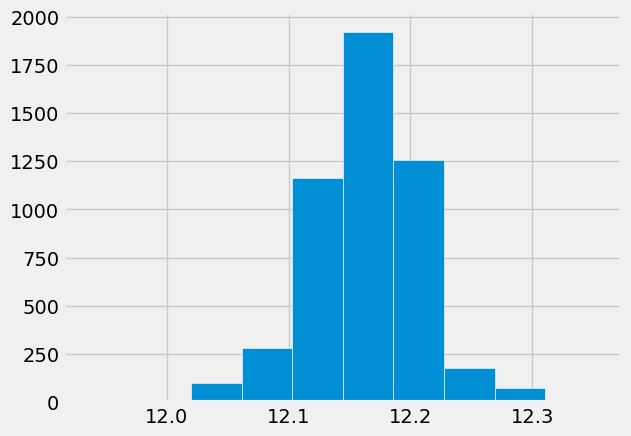

In [17]:
plots.hist(medians, bins=10)

In [18]:
left=percentile(2.5, medians)
right=percentile(97.5,  medians)
make_array(left, right)

array([ 12.06142364,  12.26760182])

Miremos el intervalo de confianza

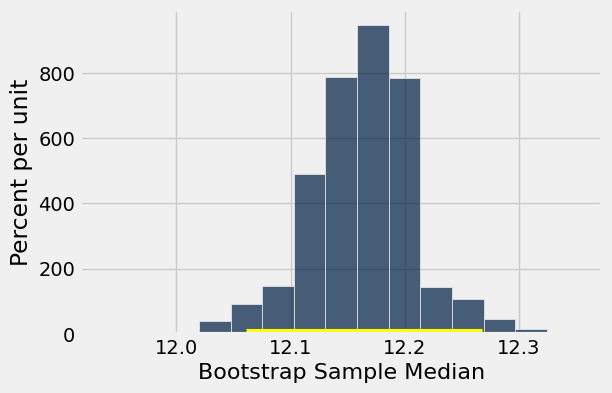

In [19]:
resampled_medians = Table().with_columns(
    'Bootstrap Sample Median', medians
)
resampled_medians.hist(bins=15)
plots.plot([left, right], [0, 0], color='yellow', lw=8);



Este intervalo es un intervalo de confianza aproximado del 95 %. Hay muchas aproximaciones involucradas en su cálculo. La aproximación no es mala, pero no es exacta.


# Estimación de un prmedio de la población 

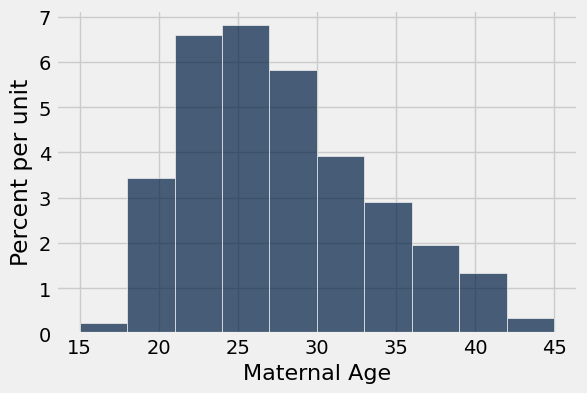

In [20]:
birth.select('Maternal Age').hist()

In [21]:
np.average(birth.column('Maternal Age'))

27.228279386712096

# ¿Cual es el valor de la edad de  madres de la población?

In [22]:
def one_bootstrap_median(madres):
    resample = madres.sample()
    return np.average(resample.column(0))
    

In [23]:
madres = birth.select('Maternal Age')
madres

Maternal Age
27
33
28
23
25
33
23
25
30
27


In [24]:
num_repetition=1000
edad = make_array()
for i in range(0, num_repetition):
    edad=np.append(edad, one_bootstrap_median(madres))

(array([   9.,   54.,  105.,  179.,  255.,  203.,  116.,   64.,   13.,    2.]),
 array([ 26.7350937,  26.8411414,  26.9471891,  27.0532368,  27.1592845,
         27.2653322,  27.3713799,  27.4774276,  27.5834753,  27.689523 ,
         27.7955707]),
 <BarContainer object of 10 artists>)

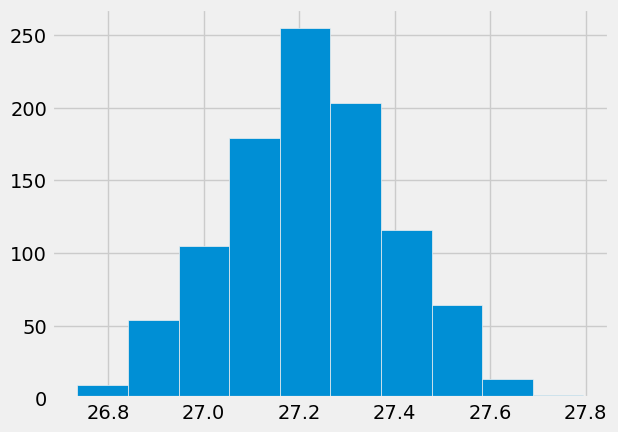

In [25]:
plots.hist(edad)

In [26]:
left=percentile(2.5, edad)
right=percentile(97.5, edad)
intervalo = make_array(left, right)

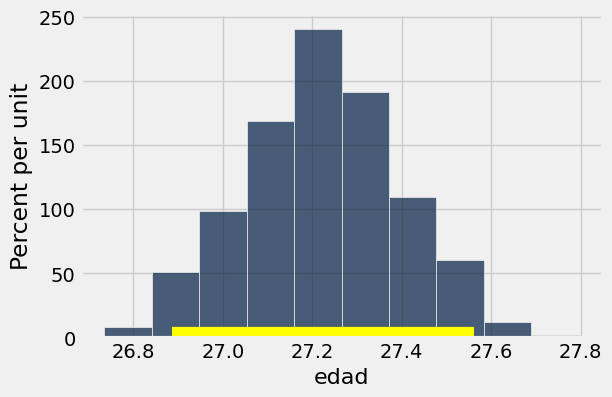

In [27]:
resampled_means = Table().with_column("edad", edad)
resampled_means.hist()
plots.plot(intervalo, [0,0], color="yellow", lw=16)

# Intervalo de confianza con otro porcentaje, el 80%

In [28]:
left_80 = percentile(10, edad)
right_80 = percentile(90, edad)
make_array(left_80, right_80)

array([ 26.98807496,  27.45059625])

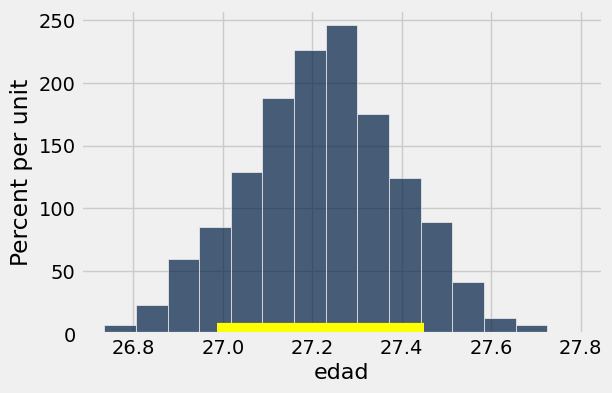

In [29]:
resampled_means.hist(bins=15)
plots.plot([left_80, right_80], [0, 0], color='yellow', lw=16);

# Estimación de una proporcion de la población

In [30]:
Cantidad_fumadores = birth.where("Maternal Smoker", are.equal_to(True)).num_rows

In [31]:
Total = birth.num_rows

In [32]:
p = Cantidad_fumadores/Total
print(p*100,"%")

39.097103918228285 %


In [33]:
smoking=birth.column("Maternal Smoker")
np.count_nonzero(smoking)/len(smoking)

0.3909710391822828

¿Que porcentaje de la poblacion fumaba durante el embarazo?

In [34]:
def one_bootstrap_proportion():
    resample = birth.sample()
    smoking = resample.column('Maternal Smoker')
    return np.count_nonzero(smoking) / len(smoking)

In [35]:
# Generate proportions from 5000 bootstrap samples
bstrap_proportions = make_array()
num_repetitions = 5000
for i in np.arange(num_repetitions):
    bstrap_proportions = np.append(bstrap_proportions, one_bootstrap_proportion())

In [36]:
# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_proportions)
right = percentile(97.5, bstrap_proportions)

make_array(left, right)

array([ 0.3637138 ,  0.41908007])

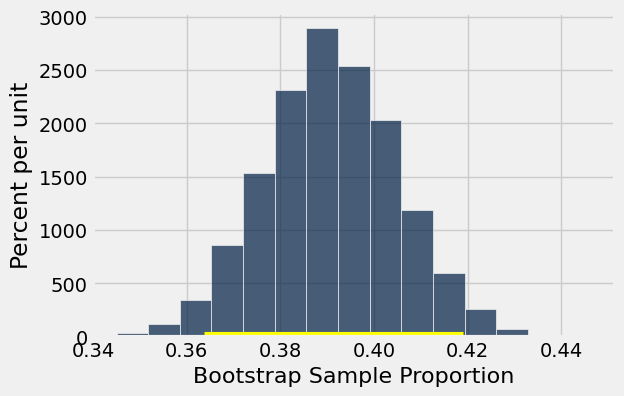

In [37]:
resampled_proportions = Table().with_columns(
    'Bootstrap Sample Proportion', bstrap_proportions
)
resampled_proportions.hist(bins=15)
plots.plot([left, right], [0, 0], color='yellow', lw=8);

El porcentaje de fumadores entre las madres en la población estaba entre el 36% y el 42%, y el proceso de estimación es correcto alrededor del 95% de las veces.

# Importancia de una Gran Muestra Aleatoria en el Remuestreo

## 1. Comenzar con una Gran Muestra Aleatoria  
Si no se parte de una muestra aleatoria suficientemente grande, es posible que el método no funcione correctamente. Su éxito depende de que tanto la muestra original como los remuestreos realizados reflejen bien la población.  

La **Ley de Promedios** establece que, si la muestra aleatoria es lo suficientemente grande, es probable que represente adecuadamente la población.  

## 2. Replicación del Procedimiento de Remuestreo  
Para aproximar la distribución de probabilidad de una estadística, es recomendable replicar el procedimiento de remuestreo tantas veces como sea posible.  

- Unos **miles de replicaciones** permiten obtener buenas aproximaciones a la distribución de la mediana de la muestra.  
- Si la distribución de la población tiene un **pico y es bastante simétrica**, unas **5.000 réplicas** pueden ser suficientes.  
- En general, se recomienda utilizar **10.000 réplicas** para obtener mejores resultados.  

## 3. Método del Percentil de Arranque  
Este método es útil para estimar la **mediana o media de la población** a partir de una gran muestra aleatoria. Sin embargo, al igual que cualquier otro método de estimación, tiene **limitaciones** y no es adecuado en todas las situaciones.  

### Situaciones en las que el método puede fallar:  
1. **Cuando se intenta estimar valores extremos**  
   - No es recomendable para estimar el **valor mínimo, máximo** o un **percentil muy bajo o muy alto** en la población.  
   - Tampoco es adecuado para parámetros altamente influenciados por valores atípicos o raros.  

2. **Cuando la distribución de probabilidad no tiene forma de campana**  
   - Si la distribución de la estadística no es aproximadamente normal, el método puede no proporcionar estimaciones precisas.  

3. **Cuando la muestra original es muy pequeña**  
   - Si la muestra contiene menos de **10 o 15 observaciones**, el método pierde fiabilidad.  

En resumen, el método del percentil de arranque es una técnica poderosa para estimar medidas de tendencia central, pero requiere una muestra grande y ciertas condiciones de distribución para ser efectivo.


# Usemos intervalos de confianza para probar hipotesis

Supongamos que alguien quiere probar la siguiente hipotesis

**Hipótesis nula:** La edad media de la población es de 30 años.

**Hipótesis alternativa:** La edad promedio en la población no es de 30 años.



Si el valor propuesto en la **hipótesis nula** **no está dentro del intervalo de confianza**, se rechaza la hipótesis al nivel de significancia elegido (por ejemplo, **5% o 1%**).  

Esto refleja la **relación entre los intervalos de confianza y las pruebas de hipótesis**:  

- Si un valor no plausible cae fuera del intervalo, es poco probable que sea la **media de la población**.  

- Esta lógica también se aplica a **proporciones poblacionales**, siempre que la muestra sea suficientemente grande.  

- Si bien en algunos casos probar hipótesis puede parecer innecesario, en ciertas situaciones resulta **útil y natural**.  
